11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 36s 73ms/step - loss: 0.2094 - val_loss: 0.1428
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 0.1346 - val_loss: 0.1264
Epoch 3/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1240 - val_loss: 0.1196
Epoch 4/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1185 - val_loss: 0.1153
Epoch 5/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1148 - val_loss: 0.1120
Epoch 6/10
469/469 [==============================] - 36s 76ms/step - loss: 0.1120 - val_loss: 0.1096
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1099 - val_loss: 0.1076
Epoch 8/10
469/469 [==============================] - 35s 75ms/step - loss: 0.1081 - val_loss: 0.1067
Epoch 9/10
469/469 [==============================] - 34s 73ms/step - loss: 0.1066 - val_loss: 0.1049
Epoch 10/10
313/3

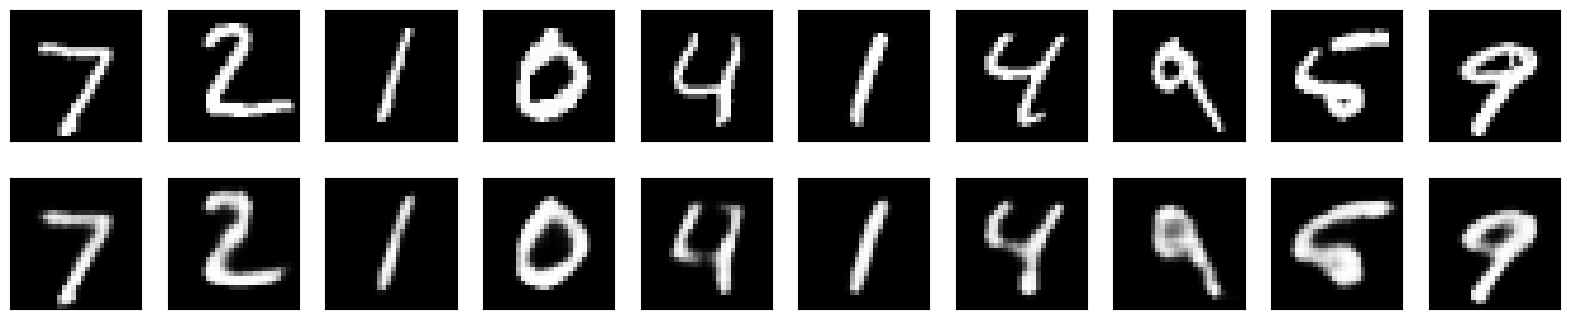

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
